In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('trialco2.csv',engine = 'python')

In [4]:
data.head()

,Anon. ID,Age,Gender,Home Region,Home Post Code,Work Region,Work Post Code,Country of Residence,Nationality,Personal Earnings,...,Q14_R4,Q14_R5,Q14_R6,Q14_R7_None,Q15_R1,Q15_R2,Q15_R3,Q15_R4,Q15_R5,Q15_R6
0,8193,30,Female,Yorkshire & Humber,BD5,Yorkshire & Humber,BD5,NaN,United Kingdom,"Less than �15,000",...,NaN,NaN,NaN,NaN,NaN,NaN,I would like to have,NaN,NaN,NaN
1,20486,43,Female,East Midlands,LN6,East Midlands,LN1,NaN,United Kingdom,"�75,000 to �84,999",...,I'm indifferent in having,NaN,NaN,NaN,I need and use frequently,NaN,NaN,NaN,NaN,NaN
2,20493,23,Female,West Midlands,B65,West Midlands,NaN,NaN,United Kingdom,"Less than �15,000",...,NaN,I don't want this,NaN,NaN,NaN,NaN,NaN,I'm indifferent in having,NaN,NaN
3,20499,34,Male,Scotland,G12,Scotland,G12,NaN,United Kingdom,"�30,000 to �34,999",...,NaN,NaN,NaN,NaN,I need and use frequently,NaN,NaN,NaN,NaN,NaN
4,45077,35,Female,London,CR2,London,NaN,NaN,United Kingdom,"Less than �15,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm indifferent in having,NaN,NaN


In [5]:
data['Household Earnings'].value_counts()

Less than �15,000       444
�15,000 to �19,999      243
�20,000 to �24,999      224
�25,000 to �29,999      213
�30,000 to �34,999      173
�35,000 to �39,999      159
�50,000 to �59,999      137
�40,000 to �44,999      117
�45,000 to �49,999      113
�60,000 to �74,999      111
�75,000 to �84,999       48
�85,000 to �99,999       34
�100,000 to �124,999     22
�200,000 and above       19
�125,000 to �149,999     13
�175,000 to �199,999      4
�150,000 to �174,999      2
Name: Household Earnings, dtype: int64

In [6]:
def clean_me(row):
    return str(row).replace('�',"")

In [7]:
data['Personal Earnings']= data['Personal Earnings'].apply(clean_me)
data['Household Earnings']= data['Household Earnings'].apply(clean_me)

In [8]:
data.dtypes

Anon. ID                    object
Age                          int64
Gender                      object
Home Region                 object
Home Post Code              object
Work Region                 object
Work Post Code              object
Country of Residence       float64
Nationality                 object
Personal Earnings           object
Household Earnings          object
Education Level             object
Relationship Status         object
Employment Status           object
Employment Type             object
Employment Sector           object
Professional Experience     object
Parental Status             object
Home Owner/Renter           object
Adults in Household         object
Children in Household      float64
Age and Gender of Child     object
Role in Household           object
Pets                        object
Q1_R1                       object
Q1_R2                       object
Q1_R3                       object
Q1_R4                       object
Q1_R5               

In [9]:
x = data['Household Earnings'][7].replace(",","")

In [10]:
x[-5:]

'above'

In [11]:
def get_avg_earnings(row):
    row = row.replace(",","")
    try:
        splits = row.split("to")
        low = float(splits[0].strip())
        high = float(splits[1].strip())
        avg = ((high - low)/2)+low
    except:
        try:
            avg = float(row[0:7])
        except:
            try:
                avg = float(row[-5:])
            except:
                avg = 0
    return avg


In [12]:
data['Avg_HH_Earnings']= data['Household Earnings'].apply(get_avg_earnings)

In [13]:
data['Avg_HH_Earnings'].value_counts()

15000.0     444
17499.5     243
22499.5     224
27499.5     213
32499.5     173
37499.5     159
54999.5     137
42499.5     117
47499.5     113
67499.5     111
79999.5      48
92499.5      34
112499.5     22
200000.0     19
137499.5     13
187499.5      4
162499.5      2
Name: Avg_HH_Earnings, dtype: int64

In [14]:
data['Household Earnings'].value_counts()

Less than 15,000      444
nan                   424
15,000 to 19,999      243
20,000 to 24,999      224
25,000 to 29,999      213
30,000 to 34,999      173
35,000 to 39,999      159
50,000 to 59,999      137
40,000 to 44,999      117
45,000 to 49,999      113
60,000 to 74,999      111
75,000 to 84,999       48
85,000 to 99,999       34
100,000 to 124,999     22
200,000 and above      19
125,000 to 149,999     13
175,000 to 199,999      4
150,000 to 174,999      2
Name: Household Earnings, dtype: int64

In [15]:
data['Avg_Per_Earnings']= data['Personal Earnings'].apply(get_avg_earnings)

In [16]:
data['Avg_Per_Earnings'].value_counts()

15000.0     435
17499.5     180
22499.5     139
27499.5     103
32499.5      61
37499.5      56
42499.5      32
47499.5      26
54999.5      24
67499.5      10
92499.5       9
200000.0      6
79999.5       6
112499.5      2
162499.5      1
Name: Avg_Per_Earnings, dtype: int64

In [17]:
data['Personal Earnings'].value_counts()

nan                   1410
Less than 15,000       435
15,000 to 19,999       180
20,000 to 24,999       139
25,000 to 29,999       103
30,000 to 34,999        61
35,000 to 39,999        56
40,000 to 44,999        32
45,000 to 49,999        26
50,000 to 59,999        24
60,000 to 74,999        10
85,000 to 99,999         9
200,000 and above        6
75,000 to 84,999         6
100,000 to 124,999       2
150,000 to 174,999       1
Name: Personal Earnings, dtype: int64

In [18]:
data.isnull().sum()

Anon. ID                      0
Age                           0
Gender                        0
Home Region                   0
Home Post Code             1467
Work Region                1354
Work Post Code             1570
Country of Residence       2500
Nationality                1421
Personal Earnings             0
Household Earnings            0
Education Level             348
Relationship Status         981
Employment Status          1352
Employment Type              39
Employment Sector           449
Professional Experience     475
Parental Status             624
Home Owner/Renter          1213
Adults in Household        1403
Children in Household      2500
Age and Gender of Child     595
Role in Household          1411
Pets                       1097
Q1_R1                      2100
Q1_R2                      1842
Q1_R3                      2026
Q1_R4                      2407
Q1_R5                      2178
Q1_R6                      2110
                           ... 
Q11_R4  

In [19]:
def get_num_child(l):
    if l == 'None':
        return 0
    try:
        lst = l.split(',')
        return len(lst)
    except:
        return 0

In [20]:
data['Children in Household']= data['Age and Gender of Child'].apply(get_num_child)

In [21]:
data.head()

,Anon. ID,Age,Gender,Home Region,Home Post Code,Work Region,Work Post Code,Country of Residence,Nationality,Personal Earnings,...,Q14_R6,Q14_R7_None,Q15_R1,Q15_R2,Q15_R3,Q15_R4,Q15_R5,Q15_R6,Avg_HH_Earnings,Avg_Per_Earnings
0,8193,30,Female,Yorkshire & Humber,BD5,Yorkshire & Humber,BD5,NaN,United Kingdom,"Less than 15,000",...,NaN,NaN,NaN,NaN,I would like to have,NaN,NaN,NaN,17499.5,15000.0
1,20486,43,Female,East Midlands,LN6,East Midlands,LN1,NaN,United Kingdom,"75,000 to 84,999",...,NaN,NaN,I need and use frequently,NaN,NaN,NaN,NaN,NaN,92499.5,79999.5
2,20493,23,Female,West Midlands,B65,West Midlands,NaN,NaN,United Kingdom,"Less than 15,000",...,NaN,NaN,NaN,NaN,NaN,I'm indifferent in having,NaN,NaN,22499.5,15000.0
3,20499,34,Male,Scotland,G12,Scotland,G12,NaN,United Kingdom,"30,000 to 34,999",...,NaN,NaN,I need and use frequently,NaN,NaN,NaN,NaN,NaN,54999.5,32499.5
4,45077,35,Female,London,CR2,London,NaN,NaN,United Kingdom,"Less than 15,000",...,NaN,NaN,NaN,NaN,NaN,I'm indifferent in having,NaN,NaN,22499.5,15000.0


In [22]:
data['Home Region'].value_counts(dropna = False)

London                325
South East            325
North West            300
Yorkshire & Humber    225
East of England       225
South West            225
West Midlands         225
East Midlands         200
Scotland              200
North East            125
Wales                 125
Name: Home Region, dtype: int64

In [23]:
data['Work Region'].value_counts(dropna = False)

NaN                   1354
London                 273
South East             171
North West             132
Yorkshire & Humber      84
East Midlands           79
West Midlands           75
South West              72
Scotland                65
North East              57
East of England         52
Not applicable          47
Wales                   38
Northern Ireland         1
Name: Work Region, dtype: int64

In [24]:
data = data.drop('Country of Residence',axis = 1)

In [25]:
def count_nats(row):
    return len(str(row).split(","))

In [26]:
data['Nationality Count']=data['Nationality'].apply(count_nats)

In [27]:
data[['Nationality','Nationality Count']].head(10)

,Nationality,Nationality Count
0,United Kingdom,1
1,United Kingdom,1
2,United Kingdom,1
3,United Kingdom,1
4,United Kingdom,1
5,United Kingdom,1
6,United Kingdom,1
7,"China, Democratic Republic of the Congo, Ethio...",4
8,United Kingdom,1
9,United Kingdom,1


In [28]:
attrs = data[['Age', 'Gender', 'Home Region', 'Home Post Code',
       'Work Region', 'Work Post Code', 'Nationality', 'Personal Earnings',
       'Household Earnings', 'Education Level','Relationship Status','Employment Type', 'Employment Sector',
              'Professional Experience','Parental Status','Home Owner/Renter','Adults in Household','Children in Household',
              'Age and Gender of Child','Role in Household','Pets']]

In [29]:
attrs = pd.DataFrame(100*(attrs.isnull().sum()/2500))

In [30]:
attrs

,0
Age,0.00
Gender,0.00
Home Region,0.00
Home Post Code,58.68
Work Region,54.16
Work Post Code,62.80
Nationality,56.84
Personal Earnings,0.00
Household Earnings,0.00
Education Level,13.92


In [31]:
attrs.columns = ['Percent Missing']

In [32]:
attrs = attrs.sort_values(by = 'Percent Missing',ascending = False)

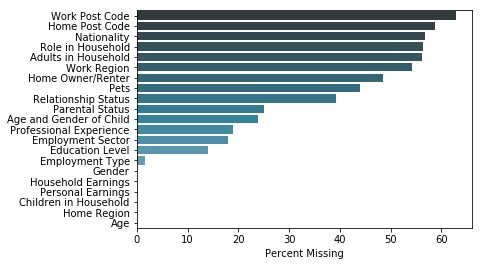

In [33]:
sb.barplot(y=attrs.index , x = attrs['Percent Missing'],palette = 'PuBuGn_d')
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


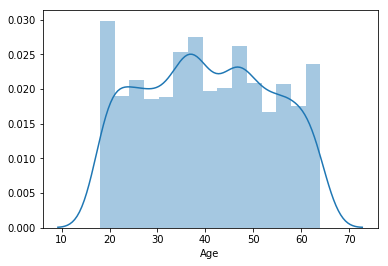

In [34]:
sb.distplot(data['Age'])
plt.show()

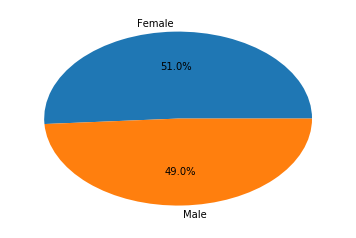

In [35]:
plt.pie(data['Gender'].value_counts(),labels = ['Female','Male'],autopct='%1.1f%%')
plt.show()

In [65]:
data.columns

Index(['Anon. ID', 'Age', 'Gender', 'Home Region', 'Home Post Code',
       'Work Region', 'Work Post Code', 'Nationality', 'Personal Earnings',
       'Household Earnings',
       ...
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q1', 'Q3'],
      dtype='object', length=162)

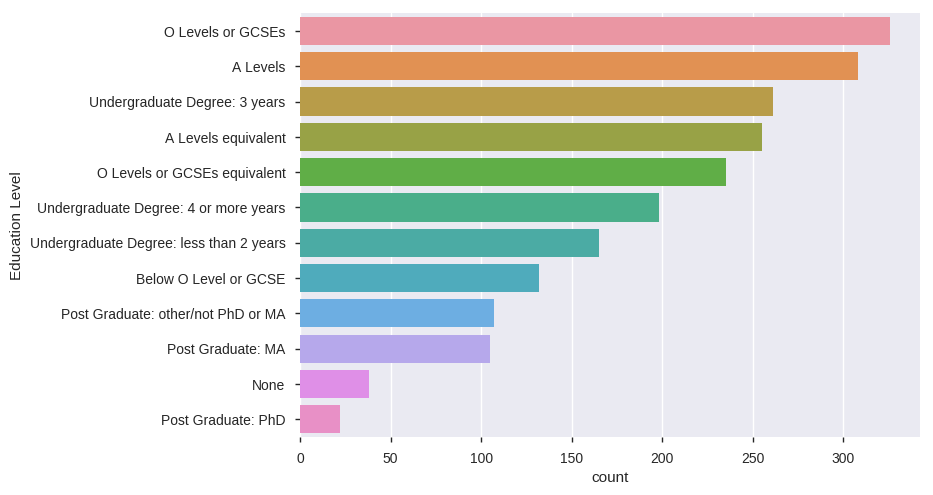

In [68]:
sb.countplot(data = data, y = 'Education Level',order = data['Education Level'].value_counts().index)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


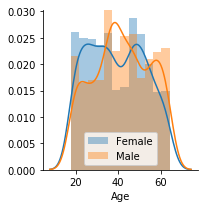

In [36]:
g = sb.FacetGrid(data,hue = 'Gender')
g = g.map(sb.distplot,"Age")
plt.legend()
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


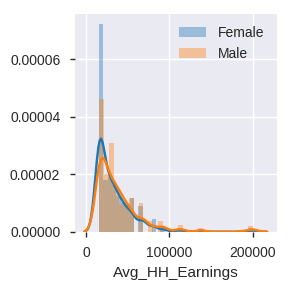

In [69]:
g = sb.FacetGrid(data,hue = 'Gender')
g = g.map(sb.distplot,"Avg_HH_Earnings")
plt.legend()
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


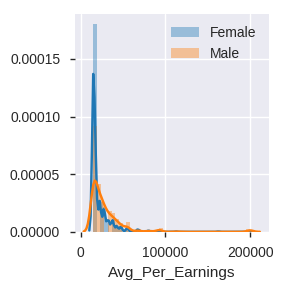

In [70]:
g = sb.FacetGrid(data,hue = 'Gender')
g = g.map(sb.distplot,"Avg_Per_Earnings")
plt.legend()
plt.show()

In [71]:
data.dtypes

Anon. ID                   object
Age                         int64
Gender                     object
Home Region                object
Home Post Code             object
Work Region                object
Work Post Code             object
Nationality                object
Personal Earnings          object
Household Earnings         object
Education Level            object
Relationship Status        object
Employment Status          object
Employment Type            object
Employment Sector          object
Professional Experience    object
Parental Status            object
Home Owner/Renter          object
Adults in Household        object
Children in Household       int64
Age and Gender of Child    object
Role in Household          object
Pets                       object
Q1_R1                      object
Q1_R2                      object
Q1_R3                      object
Q1_R4                      object
Q1_R5                      object
Q1_R6                      object
Q1_R7         

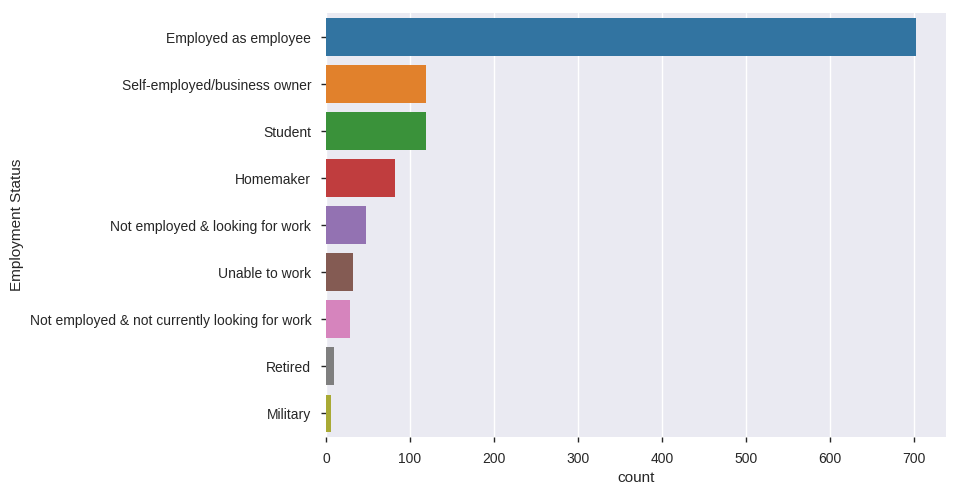

In [72]:
sb.countplot(y = 'Employment Status', data = data,order = data['Employment Status'].value_counts().index)
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


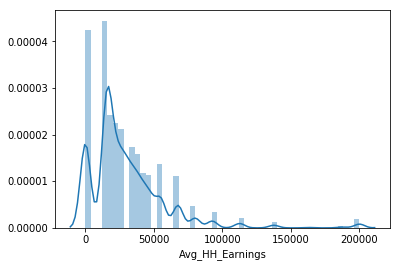

In [38]:
sb.distplot(data['Avg_HH_Earnings'].fillna(0))

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


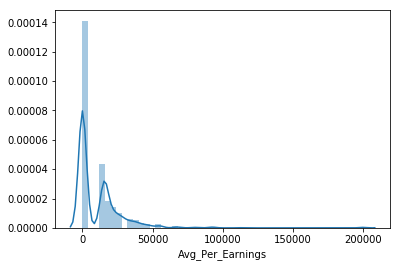

In [39]:
sb.distplot(data['Avg_Per_Earnings'].fillna(0))

In [40]:
data['No of pets']= data['Pets'].apply(count_nats)

In [41]:
pandas_profiling.ProfileReport(data)

Number of variables,124
Number of observations,2500
Total Missing (%),71.0%
Total size in memory,2.4 MiB
Average record size in memory,992.0 B
Numeric,6
Categorical,117
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [42]:
arr = list(data[['Q1_R1','Q1_R2',"Q1_R3","Q1_R4","Q1_R5"]].iloc[3])

In [43]:
arr

[nan, nan, 'I frequently read graphs and tables of numbers', nan, nan]

In [44]:
def get_score1(row):
    score = 0
    if row == "I never interact with graphs and tables of numbers":
        score = 1
    if row == "I occasionally read graphs and tables of numbers":
        score = 2
    if row == "I frequently read graphs and tables of numbers":
        score = 3
    if row == "I frequently ask others to analyse data for me":
        score = 4
    if row == "I occasionally analyse data for myself or others":
        score = 5
    if row == "I frequently analyse data for myself or others":
        score = 6
    if row == "There's nothing I can't do with data":
        score = 7
    return score

In [45]:
for i in range(1,8):
    new_col = "Q1s_"+str(i)
    old_col = "Q1_R"+str(i)
    data[new_col]= data[old_col].apply(get_score1)

In [46]:
data[['Q1s_1', 'Q1s_2',
       'Q1s_3', 'Q1s_4', 'Q1s_5', 'Q1s_6', 'Q1s_7']].describe()

,Q1s_1,Q1s_2,Q1s_3,Q1s_4,Q1s_5,Q1s_6,Q1s_7
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.160000,0.526400,0.568800,0.148800,0.644000,0.936000,0.316400
std,0.366679,0.880916,1.176189,0.757158,1.675227,2.177568,1.454489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000


In [47]:
def get_score2(row):
    score = 0
    if row == "Understanding a table of numbers":
        score = 1
    if row == 'Interpreting graphs to spot trends':
        score = 2
    if row == "Doing my own basic analysis on a dataset e.g. finding the total, average, min and max":
        score = 3
    if row == "Making a graph from a dataset e.g. stacked bar, line, scatter":
        score = 4
    if row == "Using pivot tables to analyse a dataset":
        score = 5
    if row == "Doing my own analysis using advanced logic e.g. using VLOOKUP, IF":
        score = 6
    if row == "Writing my own computer code to analyse data":
        score = 7
    if row == "Building software and analytical products":
        score = 8
    return score

In [48]:
for i in range(1,9):
    new_col = "Q2s_"+str(i)
    old_col = "Q2_R"+str(i)
    data[new_col]= data[old_col].apply(get_score2)

In [49]:
data[['Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4', 'Q2s_5',
       'Q2s_6', 'Q2s_7', 'Q2s_8']].head(10)

,Q2s_1,Q2s_2,Q2s_3,Q2s_4,Q2s_5,Q2s_6,Q2s_7,Q2s_8
0,1,2,3,4,5,6,7,8
1,1,0,0,4,5,6,0,0
2,0,0,0,4,0,0,0,0
3,0,2,3,4,0,0,0,0
4,0,0,3,0,0,0,0,0
5,1,2,0,0,0,0,0,0
6,1,2,3,4,0,0,0,0
7,1,2,3,4,0,0,0,0
8,1,2,0,4,5,6,0,8
9,1,2,3,0,0,6,0,0


In [50]:
data['Q2_total']= data[['Q2s_1', 'Q2s_2', 'Q2s_3', 'Q2s_4', 'Q2s_5',
       'Q2s_6', 'Q2s_7', 'Q2s_8']].sum(axis = 1)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


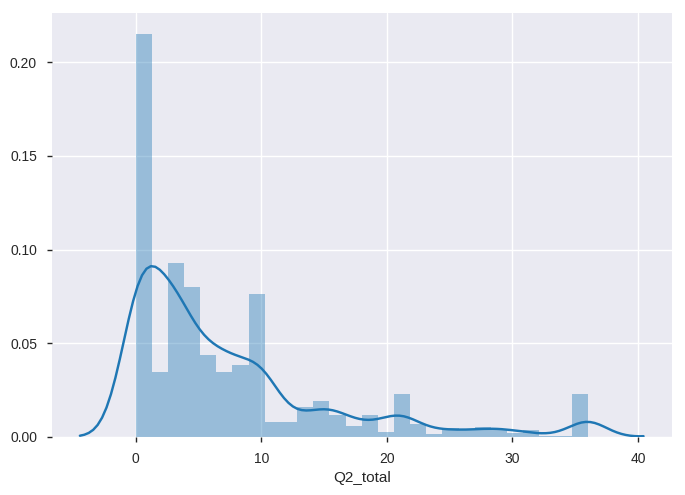

In [51]:
sb.distplot(data['Q2_total'])

In [52]:
def get_score3(row):
    score = 0
    if row == "less than 1 MB in size":
        score = 1
    if row == 'less than 10MB in size':
        score = 2
    if row == "less than 100MB in size":
        score = 3
    if row == "less than 1,000MB (=1GB) in size":
        score = 4
    if row == "less than 10,000MB (=10GB) in size":
        score = 5
    if row == "less than 100,000MB (=100GB) in size":
        score = 6
    if row == "greater than 100,000MB (=100GB) in size":
        score = 7
    return score

In [53]:
for i in range(1,9):
    new_col = "Q3s_"+str(i)
    old_col = "Q3_R"+str(i)
    data[new_col]= data[old_col].apply(get_score3)

In [54]:
def get_scores(string):
    if string =="I need and use frequently":
        return 5
    elif string == "I need and use this infrequently":
        return 4
    elif string == "I would like to have":
        return 3
    elif string == "I'm indifferent in having":
        return 2
    elif string == "I don't want this":
        return 1
    else:
        return 0

In [55]:
for i in range(4,16):
    new_col = "Q"+str(i)
    cols = []
    for j in range(1,7):
        old_col = "Q"+str(i)+"_R"+str(j)
        n2 = new_col+str(j)
        cols.append(n2)
        data[n2]=data[old_col].apply(get_scores)
    data[new_col]=data[cols].max(axis = 1)
    data= data.drop(cols,axis = 1)

In [56]:
list(data.columns)

['Anon. ID',
 'Age',
 'Gender',
 'Home Region',
 'Home Post Code',
 'Work Region',
 'Work Post Code',
 'Nationality',
 'Personal Earnings',
 'Household Earnings',
 'Education Level',
 'Relationship Status',
 'Employment Status',
 'Employment Type',
 'Employment Sector',
 'Professional Experience',
 'Parental Status',
 'Home Owner/Renter',
 'Adults in Household',
 'Children in Household',
 'Age and Gender of Child',
 'Role in Household',
 'Pets',
 'Q1_R1',
 'Q1_R2',
 'Q1_R3',
 'Q1_R4',
 'Q1_R5',
 'Q1_R6',
 'Q1_R7',
 'Q2_R1',
 'Q2_R2',
 'Q2_R3',
 'Q2_R4',
 'Q2_R5',
 'Q2_R6',
 'Q2_R7',
 'Q2_R8',
 'Q2_R9_None',
 'Q3_R1',
 'Q3_R2',
 'Q3_R3',
 'Q3_R4',
 'Q3_R5',
 'Q3_R6',
 'Q3_R7',
 'Q3_R8',
 'Q4_R1',
 'Q4_R2',
 'Q4_R3',
 'Q4_R4',
 'Q4_R5',
 'Q4_R6',
 'Q5_R1',
 'Q5_R2',
 'Q5_R3',
 'Q5_R4',
 'Q5_R5',
 'Q5_R6',
 'Q6_R1',
 'Q6_R2',
 'Q6_R3',
 'Q6_R4',
 'Q6_R5',
 'Q6_R6',
 'Q7_R1',
 'Q7_R2',
 'Q7_R3',
 'Q7_R4',
 'Q7_R5',
 'Q7_R6',
 'Q8_R1',
 'Q8_R2',
 'Q8_R3',
 'Q8_R4',
 'Q8_R5',
 'Q8_R6',
 'Q9_

In [57]:
data['Q1']= data[['Q1s_1',
 'Q1s_2',
 'Q1s_3',
 'Q1s_4',
 'Q1s_5',
 'Q1s_6',
 'Q1s_7']].max(axis = 1)

In [58]:
data['Q3']= data[['Q3s_1',
 'Q3s_2',
 'Q3s_3',
 'Q3s_4',
 'Q3s_5',
 'Q3s_6',
 'Q3s_7','Q3s_8']].max(axis = 1)

In [59]:
scores = data[['Anon. ID','Q1','Q2_total','Q2s_1',
 'Q2s_2',
 'Q2s_3',
 'Q2s_4',
 'Q2s_5',
 'Q2s_6',
 'Q2s_7',
 'Q2s_8','Q3','Q4','Q5','Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15']]

In [60]:
scores.head()

,Anon. ID,Q1,Q2_total,Q2s_1,Q2s_2,Q2s_3,Q2s_4,Q2s_5,Q2s_6,Q2s_7,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,8193,7,36,1,2,3,4,5,6,7,...,3,3,3,3,3,3,3,3,3,3
1,20486,6,16,1,0,0,4,5,6,0,...,0,5,0,5,5,2,3,5,2,5
2,20493,6,4,0,0,0,4,0,0,0,...,3,5,0,5,5,3,2,1,1,2
3,20499,3,9,0,2,3,4,0,0,0,...,5,2,1,3,5,2,3,5,3,5
4,45077,5,3,0,0,3,0,0,0,0,...,0,0,0,3,0,0,2,0,0,2


In [61]:
scores.to_csv('scores.csv')

In [62]:
attrs = data[['Anon. ID','Age', 'Gender',
       'Home Region', 'Home Post Code', 'Work Region', 'Work Post Code',
       'Nationality', 'Personal Earnings', 'Household Earnings',
       'Education Level', 'Relationship Status', 'Employment Status',
       'Employment Type', 'Employment Sector', 'Professional Experience',
       'Parental Status', 'Home Owner/Renter', 'Adults in Household',
       'Children in Household', 'Age and Gender of Child', 'Role in Household',
       'Pets', 'Avg_HH_Earnings', 'Avg_Per_Earnings', 'Nationality Count',
       'No of pets']]

In [63]:
attrs.head()

,Anon. ID,Age,Gender,Home Region,Home Post Code,Work Region,Work Post Code,Nationality,Personal Earnings,Household Earnings,...,Home Owner/Renter,Adults in Household,Children in Household,Age and Gender of Child,Role in Household,Pets,Avg_HH_Earnings,Avg_Per_Earnings,Nationality Count,No of pets
0,8193,30,Female,Yorkshire & Humber,BD5,Yorkshire & Humber,BD5,United Kingdom,"Less than 15,000","15,000 to 19,999",...,Rented House,2,3,"Boy age 7, Boy age 11, Boy age 12","Cooking, Cleaning, Laundry, Childcare","Cat(s), Dog(s)",17499.5,15000.0,1,2
1,20486,43,Female,East Midlands,LN6,East Midlands,LN1,United Kingdom,"75,000 to 84,999","85,000 to 99,999",...,Owned House,2,1,Male teen age 13,"Cooking, Cleaning, Laundry, Finances, Healthca...",I do not have any pets,92499.5,79999.5,1,1
2,20493,23,Female,West Midlands,B65,West Midlands,NaN,United Kingdom,"Less than 15,000","20,000 to 24,999",...,Living with Parents,2,0,None,"Cleaning, Laundry","Small animals or rodents (hamsters, mice, rabb...",22499.5,15000.0,1,5
3,20499,34,Male,Scotland,G12,Scotland,G12,United Kingdom,"30,000 to 34,999","50,000 to 59,999",...,Owned Flat,2,0,NaN,"Cooking, Cleaning, Laundry, Finances",Dog(s),54999.5,32499.5,1,1
4,45077,35,Female,London,CR2,London,NaN,United Kingdom,"Less than 15,000","20,000 to 24,999",...,Rented Flat,2,1,Girl age 10,"Cooking, Cleaning, Laundry, Finances, Healthca...",Cat(s),22499.5,15000.0,1,1


In [64]:
attrs.to_csv('attrs.csv')